In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('crimedata.csv')

In [4]:
print(dataset)

   State               Offence category  \
0    NSW                       Homicide   
1    NSW                       Homicide   
2    NSW                       Homicide   
3    NSW                       Homicide   
4    NSW                        Assault   
..   ...                            ...   
57   NSW     Against justice procedures   
58   NSW     Against justice procedures   
59   NSW     Against justice procedures   
60   NSW  Transport regulatory offences   
61   NSW                 Other offences   

                                  Subcategory 2016 population 2017 population  \
0                                    Murder *       7,739,274       7,739,274   
1                            Attempted murder       7,739,274       7,739,274   
2                Murder accessory, conspiracy       7,739,274       7,739,274   
3                              Manslaughter *       7,739,274       7,739,274   
4           Domestic violence related assault       7,739,274       7,739,274 

In [5]:
print(dataset.describe())

          Jan 1995     Feb 1995     Mar 1995     Apr 1995     May 1995  \
count    62.000000    62.000000    62.000000    62.000000    62.000000   
mean    708.580645   644.080645   715.403226   657.322581   680.080645   
std    1370.853911  1227.628853  1346.061108  1237.159859  1293.323769   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      22.000000    18.500000    25.750000    22.500000    20.750000   
50%     172.500000   140.500000   153.000000   160.500000   143.500000   
75%     417.000000   416.000000   469.500000   422.750000   453.500000   
max    6183.000000  5352.000000  5754.000000  5531.000000  5742.000000   

          Jun 1995     Jul 1995     Aug 1995     Sep 1995     Oct 1995  ...  \
count    62.000000    62.000000    62.000000    62.000000    62.000000  ...   
mean    670.838710   693.064516   727.048387   732.338710   788.274194  ...   
std    1282.058248  1351.772799  1394.149467  1430.292277  1545.542880  ...   
min       0.00000

In [6]:
X = dataset.iloc[:,5:].values

In [7]:
from sklearn.cluster import KMeans

In [10]:
cds = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    cds.append(kmeans.inertia_)

C:\Users\home\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


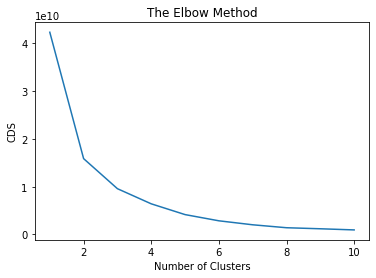

In [12]:
plt.plot(range(1,11),cds)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CDS')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

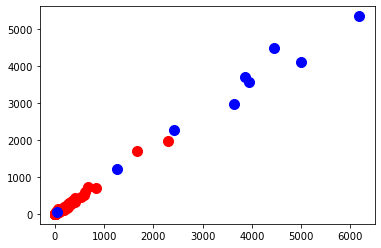

In [17]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')


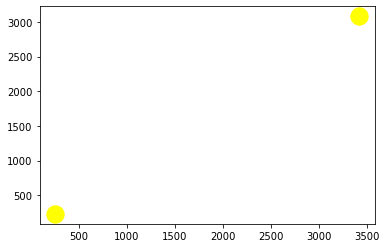

In [18]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

In [20]:
df = pd.read_csv('murder_assault_.csv')

In [25]:
X1 = df.iloc[:,[1,2]].values

In [26]:
cds1 = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X1)
    cds1.append(kmeans.inertia_)

C:\Users\home\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


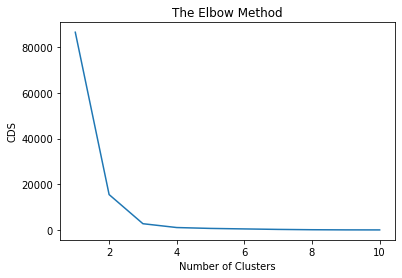

In [28]:
plt.plot(range(1,11),cds1)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CDS')
plt.show()

In [29]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X1)

In [31]:
print(kmeans)

KMeans(n_clusters=2, random_state=0)


In [30]:
print(y_kmeans)

[1 1 1 1 1 1 1 0 0 0 0]


In [34]:
print(y_kmeans==0,0)
print(y_kmeans==0,1)
print(X1[y_kmeans==0,0])
print(X1[y_kmeans==0,1])

[False False False False False False False  True  True  True  True] 0
[False False False False False False False  True  True  True  True] 1
[741 714 830 851]
[8 2 4 6]


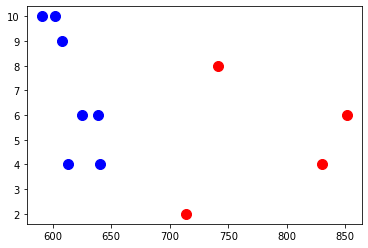

In [35]:
plt.scatter(X1[y_kmeans==0,0],X1[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X1[y_kmeans==1,0],X1[y_kmeans==1,1],s=100,c='blue',label='Cluster2')